# R-squared error change when uncorrelated input is added

On a multi-variate linear regression, does adding a random noise as input variable cause R-squared to go up or down?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('systolic.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
df.shape

(11, 3)

In [4]:
systolic = df.values
systolic.shape

(11, 3)

In [5]:
X = systolic[:,1:3]
y = systolic[:,0]

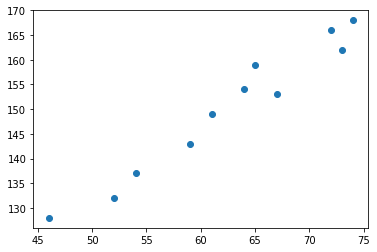

In [6]:
plt.scatter(X[:,0], y)

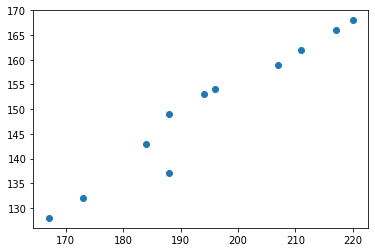

In [7]:
plt.scatter(X[:,1], y)

In [8]:
w = np.linalg.solve( np.dot(X.T, X), np.dot(X.T, y))
yhat = X.dot(w)

In [9]:
d1 = y - yhat
d2 = y - y.mean()
R2_orig = 1 - (d1.dot(d1) / d2.dot(d2))
R2_orig

0.9573580907198437

Now add a noise column to X

In [10]:
noise = np.random.rand(X.shape[0])
noise

array([0.41463344, 0.16673529, 0.3492242 , 0.64988877, 0.49514123,
       0.98368959, 0.38752125, 0.12991783, 0.51063324, 0.15509764,
       0.87544443])

In [11]:
X = np.c_[X, noise]
X.shape

(11, 3)

In [12]:
X

array([[5.20000000e+01, 1.73000000e+02, 4.14633443e-01],
       [5.90000000e+01, 1.84000000e+02, 1.66735293e-01],
       [6.70000000e+01, 1.94000000e+02, 3.49224202e-01],
       [7.30000000e+01, 2.11000000e+02, 6.49888772e-01],
       [6.40000000e+01, 1.96000000e+02, 4.95141227e-01],
       [7.40000000e+01, 2.20000000e+02, 9.83689589e-01],
       [5.40000000e+01, 1.88000000e+02, 3.87521253e-01],
       [6.10000000e+01, 1.88000000e+02, 1.29917829e-01],
       [6.50000000e+01, 2.07000000e+02, 5.10633237e-01],
       [4.60000000e+01, 1.67000000e+02, 1.55097644e-01],
       [7.20000000e+01, 2.17000000e+02, 8.75444426e-01]])

In [13]:
w = np.linalg.solve( np.dot(X.T, X), np.dot(X.T, y))
yhat = X.dot(w)
d1 = y - yhat
d2 = y - y.mean()
R2_new = 1 - (d1.dot(d1) / d2.dot(d2))
R2_new

0.9783061511311734

R2 error should improve slightly

In [14]:
R2_new - R2_orig

0.020948060411329683